In [4]:
#!/usr/bin/python3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import random
import pdb
import re
import glob
from sklearn.decomposition import NMF

In [22]:
def file2Spectra(path):
    #Open and read file
    logfile =  open(path, 'r')
    logtest = logfile.read()
    logfile.close()
    # Find Frequencies with diceimal digits
    freqstri =re.findall('Frequencies\D*(\d+.\d+)\D*(\d+.\d+)\D*(\d+.\d+)',logtest) #looking for decimal numbers and spaces
    IRIntenstri =re.findall('IR Inten\D*(\d+.\d+)\D*(\d+.\d+)\D*(\d+.\d+)',logtest)
    IrDict =[]
    for freqTuple,intTuple in zip(freqstri,IRIntenstri):
        for n,p in zip(freqTuple,intTuple):
            IrDict.append( [float(n), float(p)])
    
    Irs = np.array(IrDict)
    #normalize
    Irs[:,1] = 100*Irs[:,1]/np.amax(Irs[:,1])
    return Irs


In [23]:
def IrPlotter(item,title,leg = [], multiple = False):
    if not(multiple):
        plt.plot(np.linspace(0,4000,len(item)),item,markersize=.1)
    else:
        for n in item:
            plt.plot(np.linspace(0,4000,len(n)),n,markersize=.1)
    if len (leg) > 0:
        plt.legend(leg)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("cm^-1")    
    plt.show()
    plt.clf()

In [24]:
def gaussian_broadening(spectra, broaden, resolution=1):
 
    """ Performs gaussian broadening on IR spectrum
    generates attribute self.IR - np.array with dimmension 4000/resolution consisting gaussian-boraden spectrum
    
    spectra should be in numpy format or list with frequencies in 0 index then intensities in index 1
    :param broaden: (float) gaussian broadening in wn-1
    :param resolution: (float) resolution of the spectrum (number of points for 1 wn) defaults is 1, needs to be fixed in plotting
    """

    IR = np.zeros((int(4000/resolution) + 1))
    X = np.linspace(0,4000, int(4000/resolution)+1)
   # for f, i in zip(spectra[:,0], :  IR += i*np.exp(-0.5*((X-f)/int(broaden))**2)
   # self.IR=np.vstack((X, IR)).T #tspec
                    
                    
    for line in spectra:
        freq = line[0]
        inten = line[1]
        IR += inten*np.exp(-0.5*((X-freq)/int(broaden))**2)
    return IR



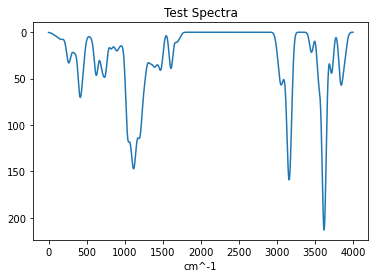

<Figure size 432x288 with 0 Axes>

In [32]:
fileList = glob.glob('Tri_A1*/Tri_A1*/input.log')
IR0 =random.choice(fileList)
IR0 = file2Spectra(IR0)
IR0 = gaussian_broadening(IR0,25,1)
#print(IR0[::5])
IrPlotter(IR0,"Test Spectra")


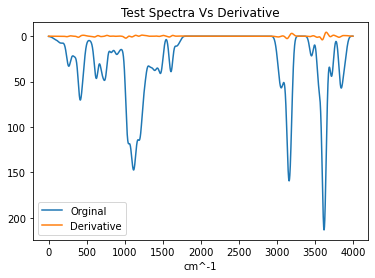

<Figure size 432x288 with 0 Axes>

In [84]:
def derivatSpectra(spectra):
    derived_spectra= []
    for n in range(len(spectra)):
        #print("hi", n)
        derived_spectra += [scipy.misc.derivative (lambda x:(spectra[int(x)]), n-1)]
    return derived_spectra
#print(derivatSpectra(IR0))
IrPlotter([IR0,derivatSpectra(IR0)],"Test Spectra Vs Derivative",leg=["Orginal","Derivative"] ,multiple = True)
#IrPlotter(derivatSpectra(IR0),"Test Spectra")


In [ ]:
derivatSpectraIrPlotter(IR0,"Test Spectra")


In [20]:
bob = [2,4,5,7,10]
for n in bob:
    print(n)
    print(scipy.misc.derivative (lambda x:x**2, n))

2
4.0
4
8.0
5
10.0
7
14.0
10
20.0


In [37]:
#int(np.floor(3.5))
int(3.9)

3

In [62]:
print((lambda x: (x+2))(3))

5


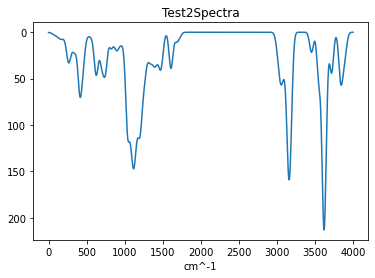

<Figure size 432x288 with 0 Axes>

In [78]:
#Proof of Conecpt for making a spectra into a function

new_spectra=[]
for n in range(len(IR0)):
    new_spectra.append( (lambda x:(IR0[int(x)]))(n))
   
IrPlotter(new_spectra,"Test2Spectra")

In [79]:
bob =[1,2,3]
tom =[]
for n in range(len(bob)):
    tom.append(bob[n])
print(tom)

[1, 2, 3]
